# Plotting data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import sys, os
os.chdir("..")

# sys.path.insert(0,'..')
import src.parse as parse
from src.plot import plot_all, automatic_plotting

In [3]:
automatic_plotting("automatic_plots")

X-n294-k50
X-n331-k15
X-n936-k151
X-n186-k15
X-n957-k87
X-n200-k36
X-n429-k61
X-n344-k43
X-n876-k59
X-n303-k21
X-n801-k40
X-n491-k59
X-n411-k19
X-n242-k48
X-n251-k28
X-n536-k96
X-n480-k70
X-n449-k29
X-n110-k13
X-n289-k60
X-n247-k50
X-n176-k26
X-n819-k171
X-n336-k84
X-n895-k37
X-n233-k16
X-n513-k21
X-n214-k11
X-n162-k11
X-n148-k46
X-n190-k8
X-n181-k23
X-n856-k95
X-n641-k35
X-n359-k29
X-n586-k159
X-n716-k35
X-n916-k207
X-n393-k38
X-n384-k52
X-n322-k28
X-n524-k153
X-n153-k22
X-n129-k18
X-n134-k13
X-n275-k28
X-n420-k130
X-n327-k20
X-n266-k58
X-n685-k75
X-n270-k35
X-n157-k13
X-n573-k30
X-n367-k17
X-n280-k17
X-n561-k42
X-n613-k62
X-n783-k48
X-n837-k142
X-n308-k13
X-n228-k23
X-n766-k71
X-n139-k10
X-n439-k37
X-n655-k131
X-n749-k98
X-n172-k51
X-n106-k14
X-n256-k16
X-n284-k15
X-n469-k138
X-n317-k53
X-n219-k73
X-n125-k30
X-n701-k44
X-n313-k71
X-n599-k92
X-n261-k13
X-n298-k31
X-n376-k94
X-n627-k43
X-n101-k25
X-n459-k26
X-n167-k10
X-n1001-k43
X-n670-k130
X-n115-k10
X-n209-k16
X-n143-k7
X-n401-k29
X

In [3]:
G = parse.parse_graph("X-n294-k50")
data = parse.parse_output("output_uchoa/X-n294-k50-ng8.log")
data_cyc2 = parse.parse_output("output_uchoa/X-n294-k50-cyc2.log")
data_spprc = parse.parse_output("output_uchoa/X-n294-k50-SPPRC.log")

MAIN: Instance X-n294-k50
PARSE: There is no minimum number of trucks.
PARSE: Using the provided K = 0
PARSE: Writing to file output/X-n294-k50.log


In [4]:
color_map = {"ng20":"b","ng8":"r","cyc2":"c","SPPRC":"k"}

color_map.keys()
data[data['method'].isin(color_map.keys())]

,method,python time,total time,propagated dominance time,unpropagated dominance time,pricing_success,upper_bound,lower_bound,abort_early,"num_paths,"
3,ng8,0.0,26.9,19.1,5.7,1,46552.6585,44638.7682,0,88
5,ng8,-0.0,24.6,17.4,5.2,1,46481.7103,45311.3046,0,23
7,ng8,0.0,22.8,16.1,4.9,1,46476.7928,46243.5827,0,7
8,ng8,0.0,22.9,16.5,4.7,1,46476.5657,46476.5657,0,0


In [8]:
plot_all([data,data_cyc2,data_spprc],time=True)

KeyError: 'upper_bound'

<Figure size 1460x800 with 0 Axes>

## Values for the figsize
This value is nice looking for the standard latex layout: plt.figure(figsize=(6.6,4),dpi=100)

This value is nice looking for the CoAn layout: plt.figure(figsize=(7.3,4),dpi=200)

This value is the original value for the presentation but looks horrible: plt.figure(figsize=(4.5,2.5),dpi=200)

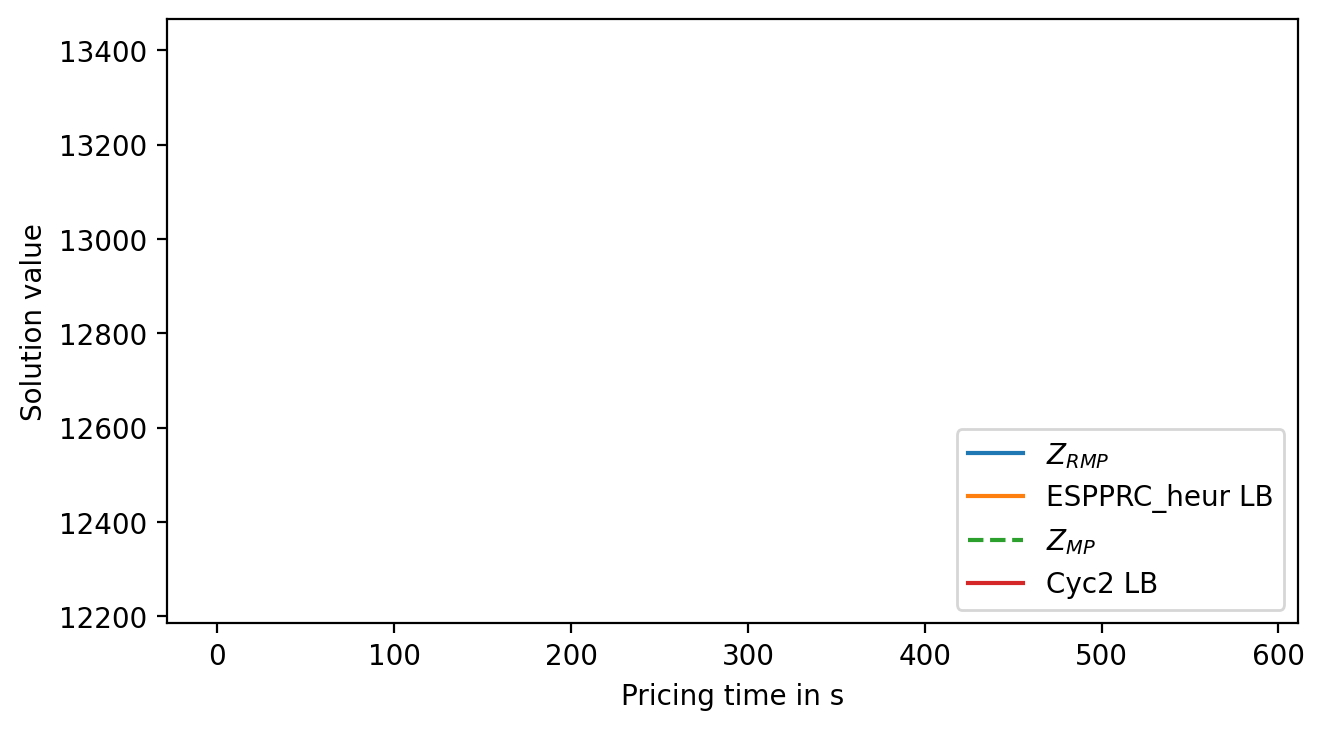

In [6]:
plt.figure(figsize=(7.3,4),dpi=200)
x_values = data['total time'].copy().cumsum()
# x_values = list(range(data.shape[0]))

upper_bounds = data['upper_bound']
plt.plot(x_values, upper_bounds, label="$Z_{\mathit{RMP}}$")

lower_bounds = data['lower_bound']
lower_bounds = []
best_lb = data['lower_bound'][0]
for lb in data['lower_bound']:
    if lb > best_lb:
        best_lb = lb
    lower_bounds.append(best_lb)
method = data['method'][0]
plt.plot(x_values, lower_bounds, label=f'{method} LB')

optimal = [13332 for i in range(len(upper_bounds))]
plt.plot(x_values, optimal, "--", label="$Z_{CVRP}$")

spprc = [12308 for i in range(len(upper_bounds))]
plt.plot(x_values,spprc, "--", label="$Z_{\mathit{SPPRC}}$")

# ng8 = [481 for i in range(len(upper_bounds))]
# plt.plot(ng8, label="Optimal value of ng 8.")

# if pricer.data['farley']:
#     farley_bounds = pricer.data['farley_bound']
#     plt.plot(x_values, farley_bounds, label="Farley Bound")

solval = upper_bounds.iloc[-1]
sol = [solval for i in range(len(upper_bounds))]
plt.plot(x_values, sol, "--",label="$Z_{MP}$")

# cyc2 = [12784 for i in range(len(upper_bounds))]
# plt.plot(x_values,cyc2, "--", label="$Z_{\mathit{2-cycle}}$")

# T = nx.minimum_spanning_tree(G)
# K = G.graph['min_trucks']
# lowest_remaining_edge_weights = [weight for u,v,weight in G.edges().data('weight') if not T.has_edge(u,v)]
# mst = T.size(weight='weight') + sum(sorted(lowest_remaining_edge_weights)[:K])
# mst = [mst for i in range(len(upper_bounds))]
# plt.plot(x_values, mst, "--", label="MST Bound")

# x_spprc = data_spprc['total time'].copy().cumsum()
# plt.plot(x_spprc, data_spprc['lower_bound'], label="SPPRC LB")

x_cyc2 = data_cyc2['total time'].copy().cumsum()
plt.plot(x_cyc2, data_cyc2['lower_bound'], label="Cyc2 LB")

plt.ylim((spprc[0]*0.99,optimal[0]*1.01))

plt.legend(loc='lower right')
plt.xlabel("Pricing time in s")
plt.ylabel("Solution value")
# plt.savefig("plots/X-n120-k6.zoomed-combined.pgf")
plt.show()